In [2]:
#Student ID 1002080520
import numpy as np
from numpy import loadtxt
import csv
import math
import matplotlib.pyplot as plt
#CODE TO TAKE THE DATA AND STORE IN THE VARIABLE

file = open('data1_training.csv')
csvreader = csv.reader(file, delimiter = ",")
data = []
for row in csvreader:
    data.append(row)

train_data = []
for i in range(0 , len(data)):
    col= []
    for j in range(0,len(data[i])):
        if j==len(data[i])-1:
            col.append(data[i][j])
        else:
            col.append(float(data[i][j]))
    train_data.append(col)
file.close()

file = open('data1_test.csv')
csvreader = csv.reader(file, delimiter = ",")
t_data = []
for row in csvreader:
    t_data.append(row)

test_data = []
for i in range(0 , len(t_data)):
    col= []
    for j in range(0,len(t_data[i])):
        if j==len(t_data[i])-1:
            col.append(t_data[i][j])
        else:
            col.append(float(t_data[i][j]))
    test_data.append(col)
file.close()


#We have successfully imported the data

In [3]:
#Importing the Input_Data in array X and corresponding Output_Data in array Y for both test and training
X = []
for i in range(len(train_data)):
    X.append(float(train_data[i][0]))
Y = []
for i in range(len(train_data)):
    Y.append(float(train_data[i][1]))

X_test = []
for i in range(len(test_data)):
    X_test.append(float(test_data[i][0]))
Y_test = []
for i in range(len(test_data)):
    Y_test.append(float(test_data[i][1]))

In [4]:
#Now we are creating two arrays where one array i.e theta which is our weight matrix will have all the constants
#We will create a phi matrix which will be having all the basis_functions , according to incremental value and depth

def basis_function(X,depth,k):
    Bf = np.ones(len(X))
    Bf = np.vstack((Bf , X))
    for j in range(1,depth+1):
        S1=[]
        C1=[]
        C2=[]
        S2=[]
        bf_1=[]
        bf_2=[]
        S1 = np.sin(np.multiply(X,j*k))**(j*k)
        C1 = np.cos(X)
        bf_1 = np.multiply(S1,C1)
        Bf = np.vstack((Bf ,bf_1))
        S2 = np.sin(X)
        C2 = np.cos(np.multiply(X,j*k))**(j*k)
        bf_2 = np.multiply(S2,C2)
        Bf = np.vstack((Bf ,bf_2))
    
    return Bf

In [5]:
#We can now generate the basis function using the basis_function successfully 
#Now we will design theta matrix in order train the model
#Intializing theta matrix first by giving everything as ones
def theta_matrix(depth):
    theta = np.ones((2*depth)+2)
    theta = np.transpose(theta)
    return np.reshape(theta , (1,(2*depth)+2))

In [6]:
def training(X,Y,theta,phi):
    for i in range(0,2000):
        ans = np.dot(theta,phi)
        actual_ans = np.multiply(np.reshape(Y,(1,len(X))),-1)
        diff = np.add(ans,actual_ans)
        changed_theta = np.dot(diff , np.transpose(phi))
        theta = np.add(theta,np.multiply(changed_theta,-0.005))
    return theta

In [7]:
# Now we have our training completed now we will predict for the test data
def predict(X_test,trained_theta,depth,k):
    bf = basis_function(X_test,depth,k)
    Y_predict = np.dot(trained_theta,bf)
    return Y_predict

In [8]:
#Now we will define a function for giving the MSE for the predicted_value
def MSE(X,Y):
    mse = np.add(X,np.multiply(Y,-1))
    mse = np.multiply(mse,mse)
    mse = np.sum(mse)
    mse = mse/len(X)
    return mse

[[ 1.82913698 -2.31785546 -6.10236018  5.24616563  1.36521922 10.11148233
   9.69412263 -0.86624183  6.17732672 -6.26365058]]


Text(0, 0.5, 'Y')

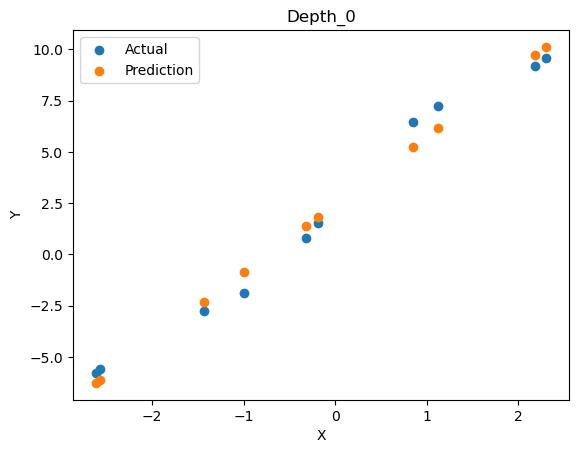

In [9]:
#We are calculating for depth = 0
phi = basis_function(X,0,1)
theta = theta_matrix(0)
theta = training(X,Y,theta,phi)
Y_predict_0 = predict(X_test,theta,0,1)
print(Y_predict_0)
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict_0 , label="Prediction")
plt.title("Depth_0")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

[[ 1.50940304 -2.78533339 -5.55862753  6.48912119  0.77160461  9.58945204
   9.20538379 -1.90362308  7.25110593 -5.77352568]]


Text(0, 0.5, 'Y')

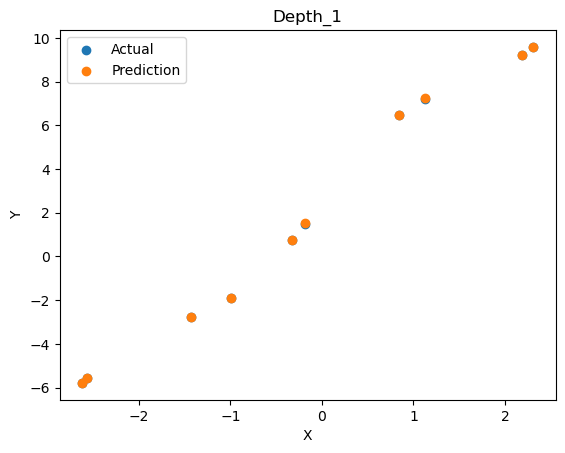

In [10]:
#Now we have all the intializations and now we will do the training for given data 
#As in given question in data generated I have been given k=1
#Generating phi matrix of bias function and taking depth=1
phi = basis_function(X,1,1)
#Generating theta matrix for depth =1
theta = theta_matrix(1)
#Training for the given depth =1
theta = training(X,Y,theta,phi)
Y_predict_1 = predict(X_test,theta,1,1)
print(Y_predict_1)
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict_1 , label="Prediction")
plt.title("Depth_1")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

[[ 1.50994122 -2.79897618 -5.57363835  6.50887902  0.7777598   9.56182215
   9.18456441 -1.89167185  7.26423399 -5.78768875]]


Text(0, 0.5, 'Y')

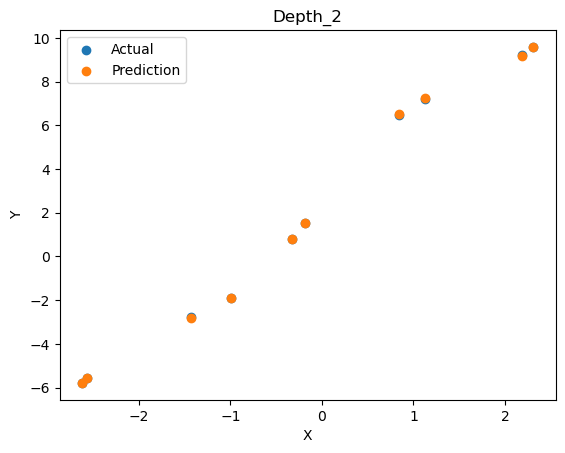

In [11]:
#Now we will do the same process for depth=2
phi_2 = basis_function(X,2,1)
theta_2 = theta_matrix(2)
theta_2 = training(X,Y,theta_2,phi_2)
Y_predict_2 = predict(X_test,theta_2,2,1)
print(Y_predict_2)
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict_2 , label="Prediction")
plt.title("Depth_2")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

[[ 1.52663985 -2.78440689 -5.56562806  6.49070644  0.77855414  9.57743529
   9.17791824 -1.9086807   7.28325053 -5.77478389]]


Text(0, 0.5, 'Y')

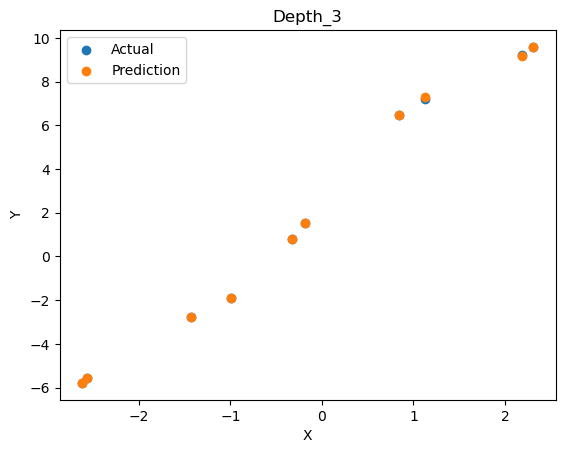

In [12]:
#Now we will do the same process for depth=3
phi_3 = basis_function(X,3,1)
theta_3 = theta_matrix(3)
theta_3 = training(X,Y,theta_3,phi_3)
Y_predict_3 = predict(X_test,theta_3,3,1)
print(Y_predict_3)
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict_3 , label="Prediction")
plt.title("Depth_3")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

[[ 1.52850111 -2.7791885  -5.5634446   6.46825708  0.78439652  9.57415191
   9.17929551 -1.9100767   7.28880261 -5.77770502]]


Text(0, 0.5, 'Y')

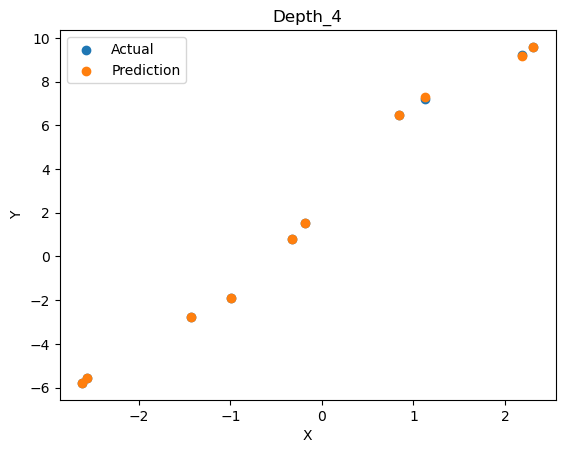

In [13]:
#Now we will do the same process for depth=4
phi_4 = basis_function(X,4,1)
theta_4 = theta_matrix(4)
theta_4 = training(X,Y,theta_4,phi_4)
Y_predict_4 = predict(X_test,theta_4,4,1)
print(Y_predict_4)
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict_4 , label="Prediction")
plt.title("Depth_4")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

[[ 1.54222086 -2.77498941 -5.54404039  6.49266045  0.82850498  9.56167535
   9.16140827 -1.90883668  7.27092874 -5.75607919]]


Text(0, 0.5, 'Y')

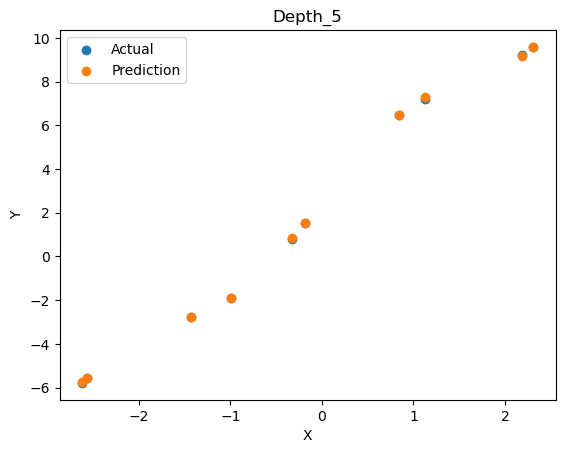

In [14]:
#Now we will do the same process for depth=5
phi_5 = basis_function(X,5,1)
theta_5 = theta_matrix(5)
theta_5 = training(X,Y,theta_5,phi_5)
Y_predict_5 = predict(X_test,theta_5,5,1)
print(Y_predict_5)
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict_5 , label="Prediction")
plt.title("Depth_5")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

[[ 1.55580437 -2.77162816 -5.54419574  6.5026823   0.84856575  9.53241331
   9.16476156 -1.93304149  7.27134171 -5.75892626]]


Text(0, 0.5, 'Y')

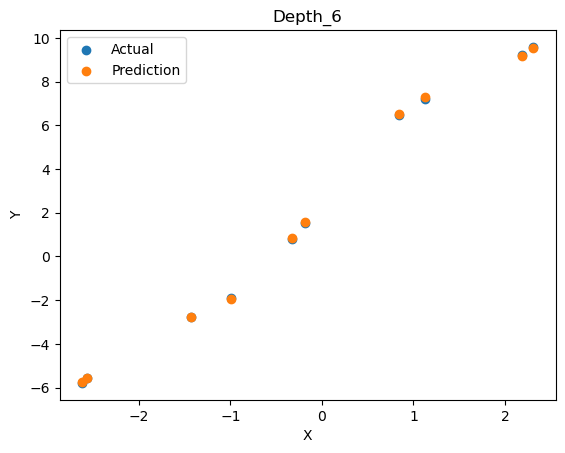

In [15]:
#Now we will do the same process for depth=5
phi_6 = basis_function(X,6,1)
theta_6 = theta_matrix(6)
theta_6 = training(X,Y,theta_6,phi_6)
Y_predict_6 = predict(X_test,theta_6,6,1)
print(Y_predict_6)
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict_6 , label="Prediction")
plt.title("Depth_6")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

In [16]:
#Calculating Mean Square Error for different Depths after training
print("Errors for respective depth")
MSE_0 = MSE(Y_predict_0,Y_test)
print(MSE_0)
MSE_1 = MSE(Y_predict_1,Y_test)
print(MSE_1)
MSE_2 = MSE(Y_predict_2,Y_test)
print(MSE_2)
MSE_3 = MSE(Y_predict_3,Y_test)
print(MSE_3)
MSE_4 = MSE(Y_predict_4,Y_test)
print(MSE_4)
MSE_5 = MSE(Y_predict_5,Y_test)
print(MSE_5)
MSE_6 = MSE(Y_predict_6,Y_test)
print(MSE_6)

Errors for respective depth
5.27936294967148
0.0031892273821373567
0.0065716187110226795
0.007404348236606726
0.007118245594719539
0.012764462088881276
0.02076365106018674


# CONCLUSION
Thus from the above given list of errors we can say that as the depth is increasing the overfitting is increasing, By the data above given we can say that we can conclude the prediction with any depth (1,2,3) rather than depth with(4,5,6) as it is overfitting the training points and is not able to gives use the minimal errors.Also we can conclude that also with 0 depth the function is underfitting the curve, thus we have the second highest errors in the zero depth function.